In [36]:
import pandas as pd
import random

from main.config.problem_config import (
    CROSSOVER_PROBABILITY,
    MAX_GENERATIONS,
    POPULATION_SIZE,
    ELITE_SIZE,
    MIGRATORY_FACTOR,
    ACCEPTABLE_RETURN,
    ACCEPTABLE_RISK
)
from main.individual.individual import Individual
from main.tools.toolbox import (
    arithmetic_roulette_crossover,
    crossover_operation,
    mutation_operation,
    mutation_stocks_fitness_driven,
    plot_stats,
    selection_rank_with_population_replacement_elite,
    stats,
    plot_frontier,
)

In [37]:
CROSSOVER_METHOD = arithmetic_roulette_crossover
MUTATION_METHOD = mutation_stocks_fitness_driven

In [38]:
assets_universe = pd.read_csv("data/all_funds_universe.csv")
assets_universe.drop(assets_universe.std()[(assets_universe.std() < 0.1)].index, axis=1, inplace=True)
Individual.set_stock_universe(universe=assets_universe)

historical_inds = []
first_population = [Individual.create_random() for _ in range(POPULATION_SIZE)]
historical_inds.extend(first_population)
population = first_population.copy()

fitness_list = list(map(lambda x: x.get_sharpe(), population))
fit_avg = [sum(fitness_list) / len(population)]
fit_best = [max(fitness_list)]
fit_best_ever = [max(fitness_list + fit_best)]

best_ind = max(population, key=lambda ind: ind.get_sharpe())

generation = 0
expected_ret = 0
risk = 1

/tmp/ipykernel_6019/981946720.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  assets_universe.drop(assets_universe.std()[(assets_universe.std() < 0.1)].index, axis=1, inplace=True)


In [39]:
while (expected_ret < ACCEPTABLE_RETURN and risk > ACCEPTABLE_RISK) or generation < MAX_GENERATIONS:
    mut_prob = random.random()

    selected_parents = selection_rank_with_population_replacement_elite(population, elite_size=ELITE_SIZE, new_pop=MIGRATORY_FACTOR)
    
    crossed_offspring = crossover_operation(population=selected_parents, method=CROSSOVER_METHOD, prob=CROSSOVER_PROBABILITY)
    mutated_offspring = mutation_operation(population=crossed_offspring, method=MUTATION_METHOD, prob=mut_prob)

    population = crossed_offspring.copy()
    historical_inds.extend(population)

    best_ind, fit_avg, fit_best, fit_best_ever = stats(population, best_ind, fit_avg, fit_best, fit_best_ever)
    expected_ret = best_ind.expected_return()
    risk = best_ind.risk()
    
    generation += 1
    print(f"GENERATION: {generation} BEST: {best_ind.get_sharpe()}")

GENERATION: 1 BEST: 0.16846764906370906
GENERATION: 2 BEST: 0.16846764906370906
GENERATION: 3 BEST: 0.177948845665899
GENERATION: 4 BEST: 0.19331439427522717
GENERATION: 5 BEST: 0.2326496434359034
GENERATION: 6 BEST: 0.28432059650011604
GENERATION: 7 BEST: 0.28432059650011604
GENERATION: 8 BEST: 0.2971969882729634
GENERATION: 9 BEST: 0.2971969882729634
GENERATION: 10 BEST: 0.3066309571002625
GENERATION: 11 BEST: 0.3066309571002625
GENERATION: 12 BEST: 0.3066309571002625
GENERATION: 13 BEST: 0.3066309571002625
GENERATION: 14 BEST: 0.3066309571002625
GENERATION: 15 BEST: 0.3220737191630981
GENERATION: 16 BEST: 0.3220737191630981
GENERATION: 17 BEST: 0.33777418642970397
GENERATION: 18 BEST: 0.33777418642970397
GENERATION: 19 BEST: 0.33777418642970397
GENERATION: 20 BEST: 0.33777418642970397
GENERATION: 21 BEST: 0.4213888280220988
GENERATION: 22 BEST: 0.45609612668940175
GENERATION: 23 BEST: 0.45609612668940175
GENERATION: 24 BEST: 0.46986255411431516
GENERATION: 25 BEST: 0.469862554114315

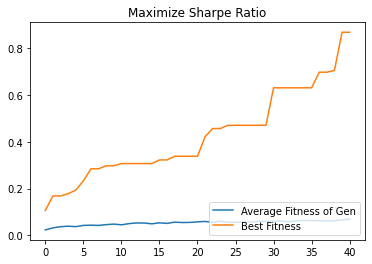

In [40]:
plot_stats(fit_avg, fit_best_ever, "Maximize Sharpe Ratio")

In [41]:
best_ret = max(historical_inds, key=lambda ind: ind.expected_return())
low_risk = min(historical_inds, key=lambda ind: ind.risk())

### BEST RETURN PORTFOLIO:

In [42]:
best_ret.expected_return()

0.01969497922267416

In [43]:
best_ret.universe.columns[best_ret.portfolio_idx].values.reshape(1, len(best_ret.portfolio_idx))

array([['LU2132881215']], dtype=object)

In [44]:
best_ret.portfolio_weights.reshape(1, len(best_ret.portfolio_weights))

array([[1]])

### BEST SHARPE PORTFOLIO:

In [45]:
best_ind.get_sharpe()

0.8668236001537891

In [46]:
best_ind.universe.columns[best_ind.portfolio_idx]

Index(['LU0234773439', 'LU0284585410', 'LU0167239168'], dtype='object')

In [47]:
best_ind.portfolio_weights.reshape(1, len(best_ind.portfolio_weights))

array([[9.99205918e-01, 2.41147971e-04, 5.52934086e-04]])

### LOWEST RISK PORFOLIO:

In [48]:
low_risk.risk()

2.3466468161463103e-05

In [49]:
low_risk.universe.columns[low_risk.portfolio_idx].values.reshape(1, len(low_risk.portfolio_idx))

array([['IE00B2Q5LL07']], dtype=object)

In [50]:
low_risk.portfolio_weights.reshape(1, len(low_risk.portfolio_weights))

array([[1]])

### EFFICIENT FRONTIER:

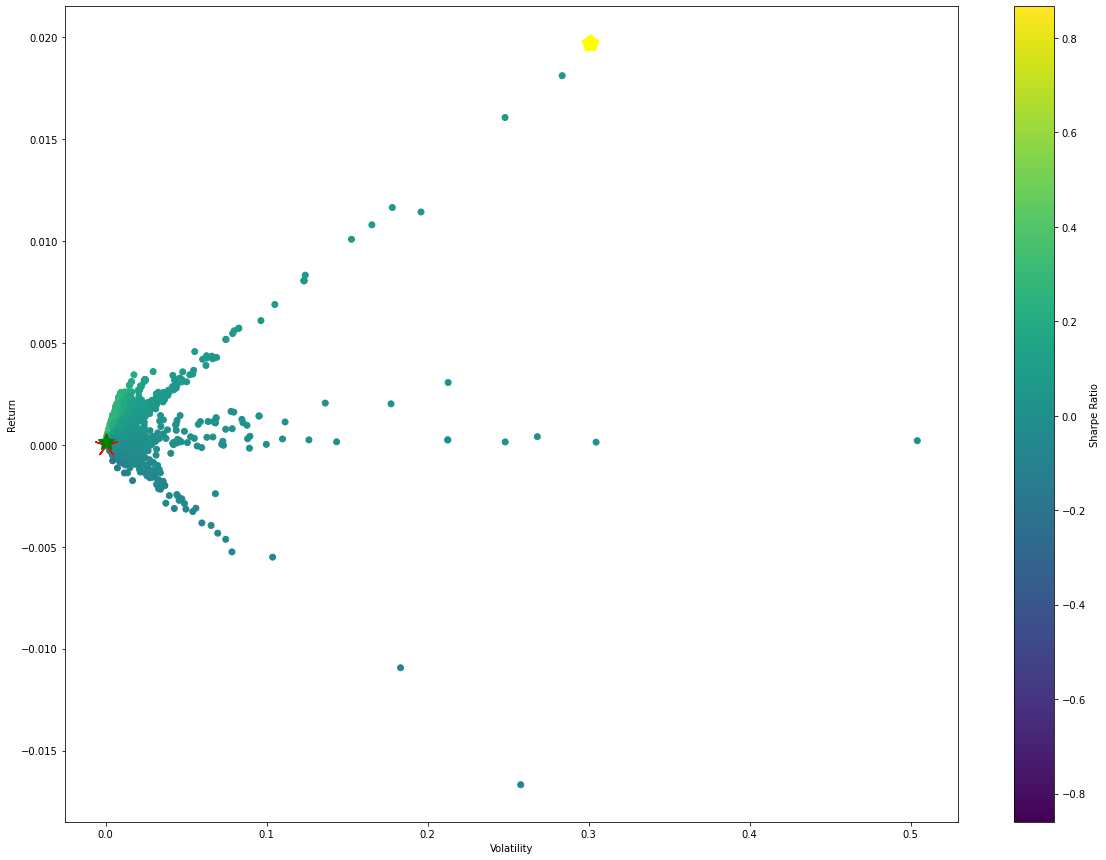

In [51]:
ret = list(map(lambda x: x.expected_return(), historical_inds))
risk = list(map(lambda x: x.risk(), historical_inds))

plot_frontier(risk=risk, ret=ret, lr=low_risk, br=best_ret, bs=best_ind)